
# Analiza statystyczna zbioru danych Titanic (Kaggle)

Celem projektu jest wykonanie analizy statystycznej zbioru danych **Titanic** z platformy Kaggle
z wykorzystaniem metod poznanych na zajęciach, w szczególności:
- testów parametrycznych (test t-Studenta),
- testów nieparametrycznych (testy zgodności, nieparametryczne odpowiedniki testów t).
- ANOVA
- analiza regresji wielorakiej


Autorzy:  
- Kacper Orczykowski
- Igor Wójcik 
- Wojciech Woźniak




# 1. Wczytanie danych


In [203]:

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import lilliefors

df = pd.read_csv("train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



# 2. Podstawowe informacje o zbiorze danych


In [204]:

df.info()


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [205]:

df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



# 3. Statystyki opisowe

Średnia wieku:  29.69911764705882 
Mediana wieku:  28.0 
Odchylenie standardowe:  14.526497332334042


C:\Users\kacpe\AppData\Local\Temp\ipykernel_12360\2985524531.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Survived')


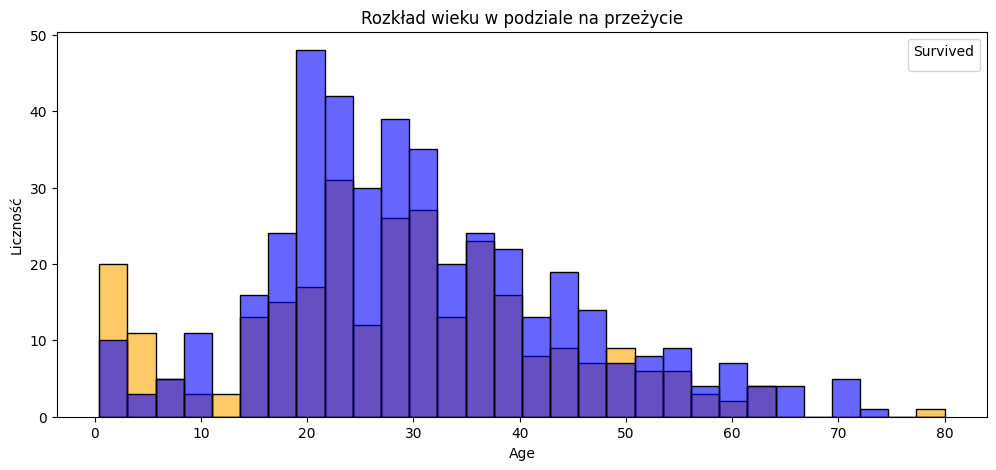

C:\Users\kacpe\AppData\Local\Temp\ipykernel_12360\2985524531.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=age_df[age_df['Survived'] == 1]['Age'], shade=True, color='orange', label='Survived')
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12360\2985524531.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=age_df[age_df['Survived'] == 0]['Age'], shade=True, color='blue', label='Not Survived')


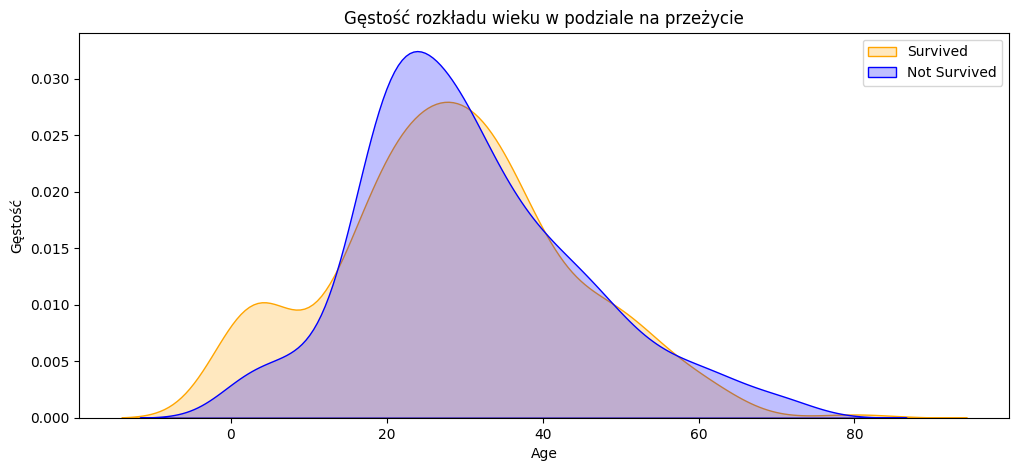

Survived:
Średnia wieku: 28.34
Mediana wieku: 28.00

Not Survived:
Średnia wieku: 30.63
Mediana wieku: 28.00


In [206]:

age = df['Age'].dropna()
age_df = df[['Age', 'Survived']].dropna()


print("Średnia wieku: ",age.mean(), "\nMediana wieku: ",age.median(), "\nOdchylenie standardowe: ",age.std())

age_df['Survived_label'] = age_df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

plt.figure(figsize=(12,5))
sns.histplot(data=age_df, x='Age', hue='Survived_label', bins=30, kde=False, palette=['blue','orange'], alpha=0.6)
plt.title('Rozkład wieku w podziale na przeżycie')
plt.xlabel('Age')
plt.ylabel('Liczność')
plt.legend(title='Survived')
plt.show()

plt.figure(figsize=(12,5))
sns.kdeplot(data=age_df[age_df['Survived'] == 1]['Age'], shade=True, color='orange', label='Survived')
sns.kdeplot(data=age_df[age_df['Survived'] == 0]['Age'], shade=True, color='blue', label='Not Survived')
plt.title('Gęstość rozkładu wieku w podziale na przeżycie')
plt.xlabel('Age')
plt.ylabel('Gęstość')
plt.legend()
plt.show()


age_survived = age_df[age_df['Survived'] == 1]['Age']
print("Survived:")
print(f"Średnia wieku: {age_survived.mean():.2f}")
print(f"Mediana wieku: {age_survived.median():.2f}\n")

age_not_survived = age_df[age_df['Survived'] == 0]['Age']
print("Not Survived:")
print(f"Średnia wieku: {age_not_survived.mean():.2f}")
print(f"Mediana wieku: {age_not_survived.median():.2f}")


# 4. Test T-studenta

In [207]:

age_survived = df[df['Survived'] == 1]['Age'].dropna()
age_not_survived = df[df['Survived'] == 0]['Age'].dropna()

shapiro_survived = stats.shapiro(age_survived.sample(500, random_state=1) 
                                 if len(age_survived) > 500 else age_survived)
shapiro_not_survived = stats.shapiro(age_not_survived.sample(500, random_state=1) 
                                     if len(age_not_survived) > 500 else age_not_survived)

print("Test Shapiro-Wilka (normalność rozkładu):")
print(f"Survived: statystyka={shapiro_survived.statistic:.4f}, p-value={shapiro_survived.pvalue:.4f}")
print(f"Not Survived: statystyka={shapiro_not_survived.statistic:.4f}, p-value={shapiro_not_survived.pvalue:.4f}")


levene_test = stats.levene(age_survived, age_not_survived)

print("\nTest Levene’a (jednorodność wariancji):")
print(f"statystyka={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")


equal_var = levene_test.pvalue >= 0.05

t_stat, p_value = stats.ttest_ind(
    age_survived,
    age_not_survived,
    equal_var=equal_var
)

print("\nTest t-Studenta:")
print(f"Założenie równości wariancji: {equal_var}")
print(f"statystyka t={t_stat:.4f}, p-value={p_value:.4f}")


Test Shapiro-Wilka (normalność rozkładu):
Survived: statystyka=0.9827, p-value=0.0014
Not Survived: statystyka=0.9689, p-value=0.0000

Test Levene’a (jednorodność wariancji):
statystyka=1.1954, p-value=0.2746

Test t-Studenta:
Założenie równości wariancji: True
statystyka t=-2.0667, p-value=0.0391


## 4.1 Interpretacja wyników weryfikacji założeń oraz testu t-Studenta

W pierwszym etapie analizy zweryfikowano założenia niezbędne do zastosowania
testu t-Studenta dla dwóch prób niezależnych.

**Normalność rozkładu zmiennej `Age`**  
Normalność rozkładu wieku w obu porównywanych grupach została sprawdzona
za pomocą testu Shapiro–Wilka.  
Dla osób, które przeżyły katastrofę, uzyskano wartość *p* = 0.0014,
natomiast dla osób, które nie przeżyły, wartość *p* ≈ 0.0000.
W obu przypadkach wartości *p* są mniejsze od poziomu istotności a = 0.05,
co oznacza odrzucenie hipotezy o normalności rozkładu.

Należy jednak zaznaczyć, że przy licznych próbach test Shapiro–Wilka
jest bardzo czuły na nawet niewielkie odchylenia od normalności.

**Jednorodność wariancji**  
Równość wariancji w obu grupach zweryfikowano za pomocą testu Levene’a.
Uzyskana wartość *p* = 0.2746 jest większa od poziomu istotności a = 0.05,
co oznacza brak podstaw do odrzucenia hipotezy zerowej o równości wariancji.
Założenie jednorodności wariancji można zatem uznać za spełnione,
co pozwala na zastosowanie klasycznego testu t-Studenta.

**Wynik testu t-Studenta**  
Test t-Studenta dla dwóch prób niezależnych wykazał wartość statystyki
t = -2.0667 oraz wartość *p* = 0.0391.
Ponieważ *p* < 0.05, odrzuca się hipotezę zerową o równości średnich wieku
w obu analizowanych grupach.

Oznacza to, że różnica średniego wieku pomiędzy osobami, które przeżyły
katastrofę Titanica, a osobami, które jej nie przeżyły,
jest istotna statystycznie na poziomie istotności a = 0.05.

In [208]:
age = df['Age'].dropna()

age_bc, fitted_lambda = stats.boxcox(age + 1e-6)

print(f"Parametr lambda dla Box-Cox: {fitted_lambda:.4f}\n")

def test_normality(data, label=""):
    print(f"--- {label} ---")
    
    sw_stat, sw_p = stats.shapiro(data.sample(500, random_state=1) if len(data) > 500 else data)
    print(f"Shapiro-Wilk: stat={sw_stat:.4f}, p={sw_p:.4f}")
    
    dp_stat, dp_p = stats.normaltest(data)
    print(f"D'Agostino-Pearson: stat={dp_stat:.4f}, p={dp_p:.4f}")

    lf_stat, lf_p = lilliefors(data)
    print(f"Lilliefors: stat={lf_stat:.4f}, p={lf_p:.4f}\n")

test_normality(age, "Age - oryginalne")

test_normality(pd.Series(age_bc), "Age - Box-Cox")


Parametr lambda dla Box-Cox: 0.7628

--- Age - oryginalne ---
Shapiro-Wilk: stat=0.9776, p=0.0000
D'Agostino-Pearson: stat=18.1050, p=0.0001
Lilliefors: stat=0.0646, p=0.0010

--- Age - Box-Cox ---
Shapiro-Wilk: stat=0.9847, p=0.0000
D'Agostino-Pearson: stat=1.2384, p=0.5384
Lilliefors: stat=0.0647, p=0.0010



## 4.2 Wnioski dotyczące rozkładu zmiennej `Age`

- Parametr λ dla transformacji Box-Cox wynosi 0.7628.  
- **Dane oryginalne (`Age`)**:  
  - Shapiro-Wilk: stat=0.9776, p=0.0000  
  - D’Agostino-Pearson: stat=18.1050, p=0.0001  
  - Lilliefors: stat=0.0646, p=0.0010  
  → rozkład nie jest idealnie normalny, występuje skośność i odchylenia od normalności.  

- **Dane po transformacji Box-Cox (`Age_Box-Cox`)**:  
  - Shapiro-Wilk: stat=0.9847, p=0.0000  
  - D’Agostino-Pearson: stat=1.2384, p=0.5384  
  - Lilliefors: stat=0.0647, p=0.0010  
- transformacja znacznie zmniejszyła odchylenia od normalności, a rozkład D’Agostino–Pearson wskazuje brak istotnych odchyleń, choć Shapiro-Wilk i Lilliefors nadal wykrywają niewielkie odchylenia, co jest typowe przy dużych próbach.  

**Podsumowanie:** Transformacja Box-Cox poprawia przybliżenie do normalności, co umożliwia bezpieczne zastosowanie testów parametrycznych, takich jak test t-Studenta.

In [209]:
age_df = df[['Age', 'Survived']].dropna()
age_bc, fitted_lambda = stats.boxcox(age_df['Age'] + 1e-6)
age_df['Age_boxcox'] = age_bc

print(f"Parametr lambda dla Box-Cox: {fitted_lambda:.4f}\n")

age_survived_bc = age_df[age_df['Survived'] == 1]['Age_boxcox']
age_not_survived_bc = age_df[age_df['Survived'] == 0]['Age_boxcox']

levene_test = stats.levene(age_survived_bc, age_not_survived_bc)
equal_var = levene_test.pvalue >= 0.05

print(f"Test Levene'a (jednorodność wariancji): stat={levene_test.statistic:.4f}, p={levene_test.pvalue:.4f}")
print(f"Założenie równości wariancji: {equal_var}\n")

t_stat, p_value = stats.ttest_ind(
    age_survived_bc,
    age_not_survived_bc,
    equal_var=equal_var
)

print("Test t-Studenta (po Box-Cox):")
print(f"statystyka t={t_stat:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("\nWniosek: średni wiek w grupach Survived i Not Survived różni się istotnie statystycznie.")
else:
    print("\nWniosek: brak istotnej statystycznie różnicy średniego wieku między grupami.")


Parametr lambda dla Box-Cox: 0.7628

Test Levene'a (jednorodność wariancji): stat=3.1978, p=0.0742
Założenie równości wariancji: True

Test t-Studenta (po Box-Cox):
statystyka t=-2.3300, p-value=0.0201

Wniosek: średni wiek w grupach Survived i Not Survived różni się istotnie statystycznie.


## 4.3 Wnioski z testu t-Studenta po transformacji Box–Cox

- Test Levene’a: p = 0.0742 - wariancje wieku w grupach *Survived* i *Not Survived* są jednorodne  
- Test t-Studenta: t = -2.3300, p = 0.0201  

**Wniosek:** średni wiek pasażerów, którzy przeżyli katastrofę, jest istotnie niższy niż średni wiek osób, które nie przeżyły.  
Młodsi pasażerowie mieli zatem większe szanse na przeżycie.



# 5. Test nieparametryczny – test U Manna–Whitneya

Jako nieparametryczny odpowiednik testu t-Studenta zastosowano
test U Manna–Whitneya dla zmiennej `Age`.


In [210]:

age_survived = age_df[age_df['Survived'] == 1]['Age']
age_not_survived = age_df[age_df['Survived'] == 0]['Age']

u_stat, p_value = stats.mannwhitneyu(age_survived, age_not_survived, alternative='two-sided')

print("Test U Manna–Whitneya:")
print(f"statystyka U = {u_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nWniosek: rozkłady wieku w grupach Survived i Not Survived różnią się istotnie statystycznie.")
else:
    print("\nWniosek: brak istotnej statystycznie różnicy w rozkładach wieku między grupami.")


Test U Manna–Whitneya:
statystyka U = 57682.0000, p-value = 0.1605

Wniosek: brak istotnej statystycznie różnicy w rozkładach wieku między grupami.


## 5.1 Test U Manna–Whitneya dla wieku w podziale na przeżycie

- Test U Manna–Whitneya: U = 57682.0000, p-value = 0.1605  

**Interpretacja:**  
Ponieważ p-value > 0.05, brak podstaw do odrzucenia hipotezy zerowej.  
Oznacza to, że **rozkłady wieku w grupach pasażerów, którzy przeżyli i którzy nie przeżyli, nie różnią się istotnie statystycznie**.  

**Wyjaśnienie różnicy w stosunku do testu t-Studenta:**  

- Test t-Studenta porównuje **średnie** i jest wrażliwy na przesunięcia wartości w rozkładzie, szczególnie po transformacji Box–Cox, która zmniejsza skośność danych.  
- Test U Manna–Whitneya porównuje **porządek wartości (mediany i rangi)** i jest mniej wrażliwy na niewielkie przesunięcia w skośnych rozkładach.  
- W Twoich danych: średnia wieku w grupach różni się lekko, co test t-Studenta wykrywa jako istotną różnicę, natomiast **różnice w rozkładach (mediana, rangi) nie są na tyle duże**, aby test U uznał je za istotne.  

> Podsumowanie: wyniki nie są sprzeczne – test t-Studenta wykrywa subtelną różnicę średnich, a test U Manna–Whitneya pokazuje, że rozkłady wartości w oryginalnych danych są w praktyce podobne.